# **Un-Supervised Machine Learning(K-means Clustering, KNN):**




**1.Read heart dataset and adult dataset  using KNN (heart dataset) K-means (adult dataset).**

**2.Read and analyze the heart dataset and adult dataset using KNN (heart dataset) K-means (adult dataset) calculate the Accuracy, Precision, Recall, and F1-score.**

**3.Plot the scatter and elbow point graphs by using KNN and scatter graph using K-means methods.**

# **KNN**

In [ ]:
import pandas as pd
import numpy as np

## **Reading the dataset**

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## **Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

<Figure size 2160x1080 with 0 Axes>

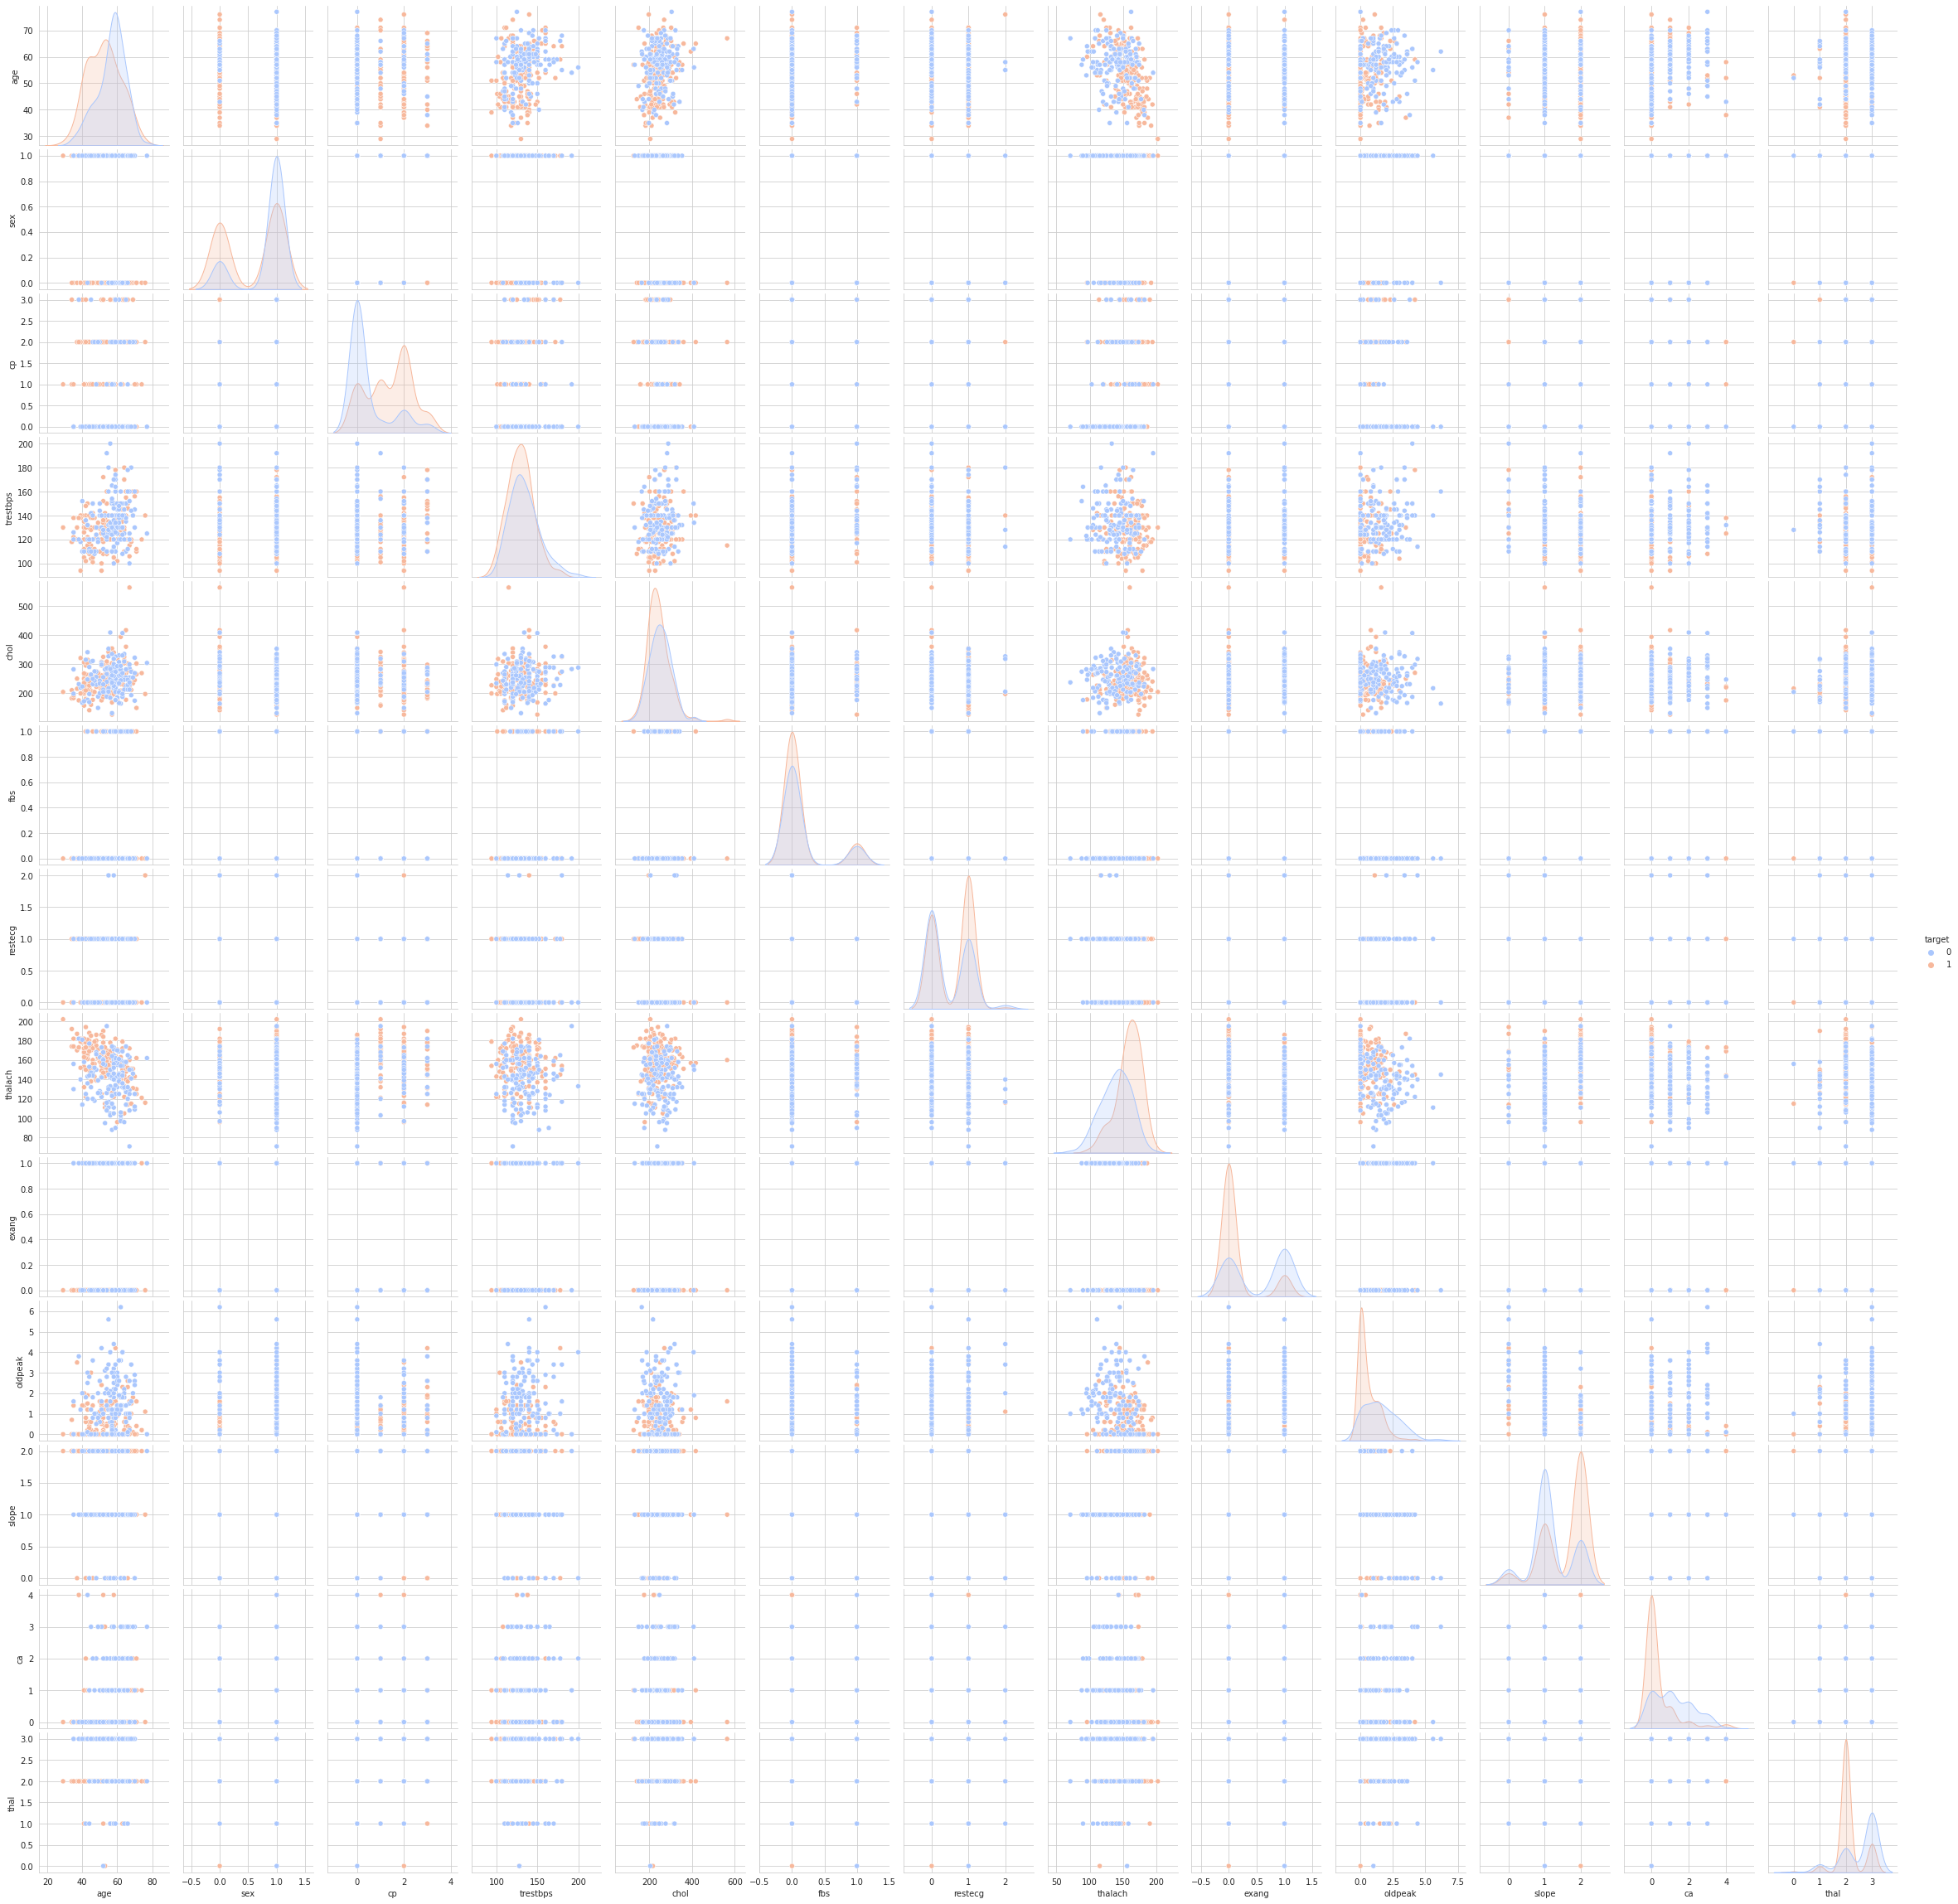

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(30,15))
sns.pairplot(df, hue='target', palette='coolwarm')

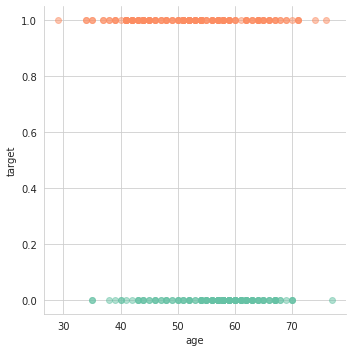

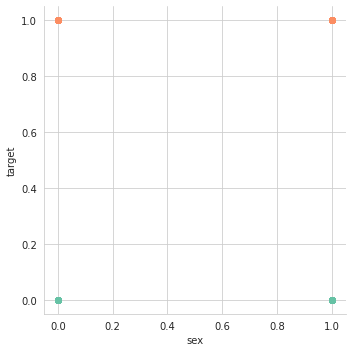

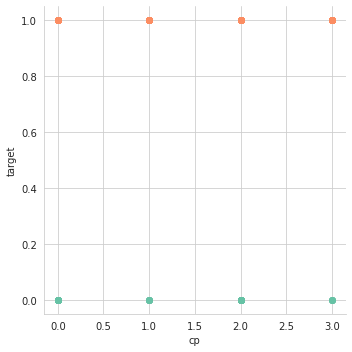

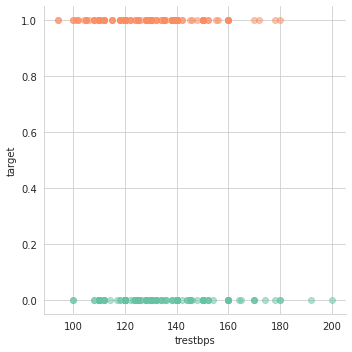

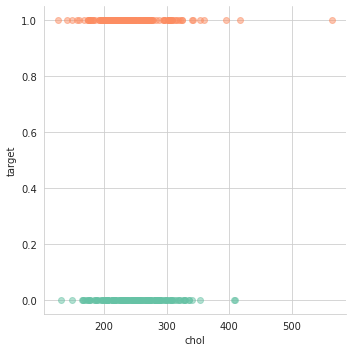

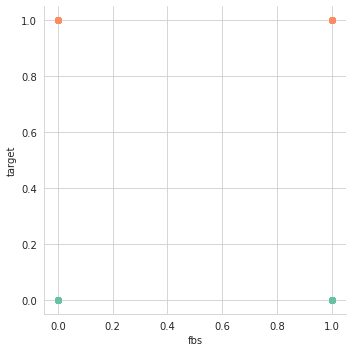

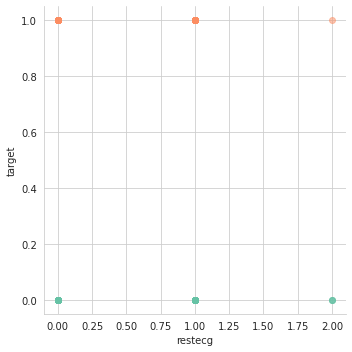

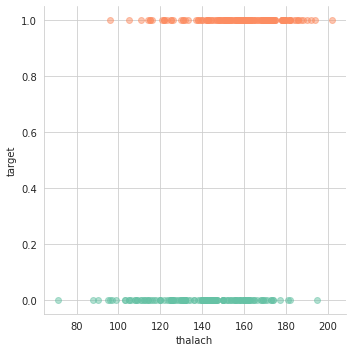

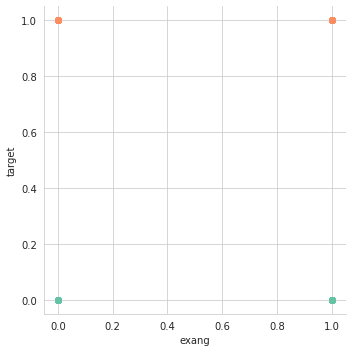

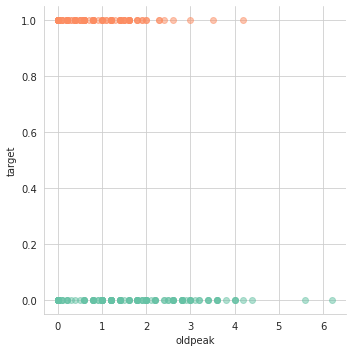

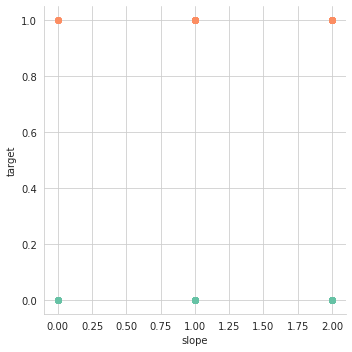

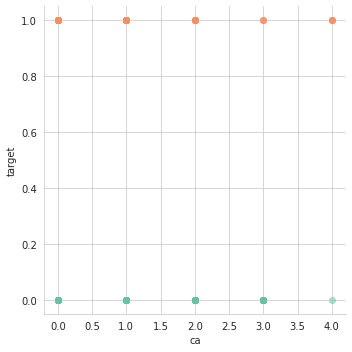

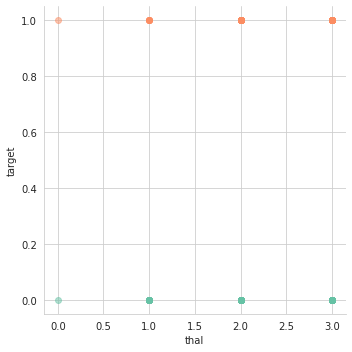

In [ ]:
for col in df.drop(['target'], axis=1).columns:
    sns.lmplot(data=df, x=col, y='target', fit_reg=False, hue='target',palette='Set2', legend=False, scatter_kws={'alpha':0.5})

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## **Scaling and Splitting the data into training and testing data**

In [ ]:
X = df.drop(['target'], axis=1)
Y = df['target']

from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
X = stds.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

## **calculating k**

In [ ]:
def knnprediction(k, X_train, Y_train, X_test):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    return pred

error_mean = []
for k in range(1, 41):
    pred_i = knnprediction(k, X_train, Y_train, X_test)
    error_mean.append(np.mean(pred_i != Y_test))    

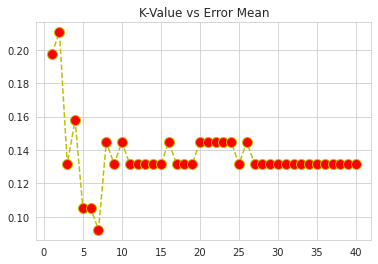

In [ ]:
plt.plot(range(1,41), error_mean, linestyle='dashed', color='y', marker='o', markerfacecolor='r', markersize=10)
plt.title('K-Value vs Error Mean')
plt.show()

## **k=7**

In [ ]:
predictions = knnprediction(7, X_train, Y_train, X_test)

## **Accuracy Description**

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

cm = confusion_matrix(Y_test, predictions)
print(cm)

[[31  4]
 [ 3 38]]


In [ ]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.90      0.93      0.92        41

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76



# ***K-means Clustering***

* Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

### **Reading the dataset**

In [ ]:
dfs = pd.read_csv('adult.csv',skipinitialspace=True)
dfs.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## **Labelling the column**

In [ ]:
dfs.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'captialgain', 'capitalloss',
       'hoursperweek', 'native-country', 'class']
dfs.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,captialgain,capitalloss,hoursperweek,native-country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
dfs.describe()

,age,fnlwgt,education-num,captialgain,capitalloss,hoursperweek
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
dfs.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
gender            object
captialgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
class             object
dtype: object

In [ ]:
dfs.shape

(32560, 15)

## **Data Visualization**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

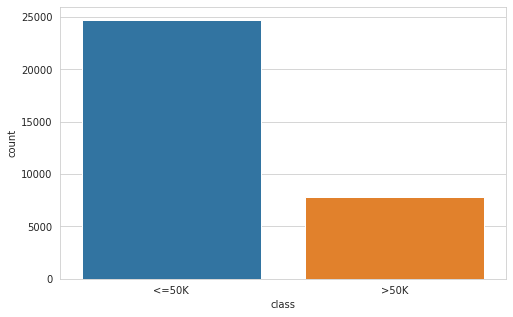

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="class", data=dfs)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

In [ ]:
df_encoded = pd.get_dummies(data=dfs,columns=dfs.select_dtypes(include=[object]).columns,drop_first=True)
df_encoded.head()

,age,fnlwgt,education-num,captialgain,capitalloss,hoursperweek,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,...,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class_>50K
0,50,83311,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,38,215646,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,53,234721,7,0,0,40,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X = df_encoded.drop('class_>50K',axis=1)
Y = df_encoded['class_>50K']

In [ ]:
X_scaled = MinMaxScaler().fit_transform(X)

## **Elbow point Graph**

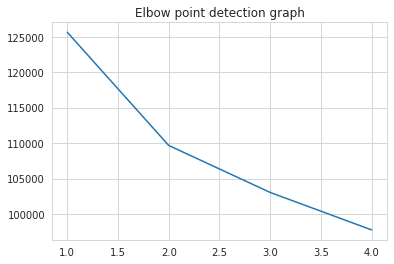

In [ ]:
inertia = []
for k in range(1,5):
    k_cluster = KMeans(n_clusters=k)
    k_cluster.fit_transform(X_scaled)
    inertia.append(k_cluster.inertia_)

plt.plot(range(1,5),inertia)
plt.title("Elbow point detection graph")
plt.show()

In [ ]:
K_model = KMeans(n_clusters=2,random_state=101)
K_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [ ]:
prediction = K_model.labels_
prediction

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
Y.values

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

## **Accuracy Description**

In [ ]:
print(classification_report(Y,prediction))
print(confusion_matrix(Y,prediction))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75     24719
           1       0.23      0.24      0.23      7841

    accuracy                           0.62     32560
   macro avg       0.49      0.49      0.49     32560
weighted avg       0.63      0.62      0.62     32560

[[18275  6444]
 [ 5948  1893]]


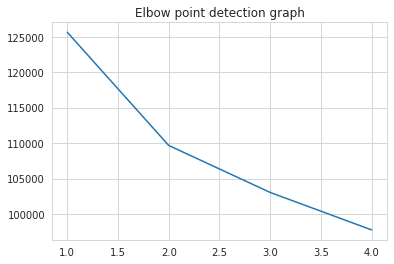

In [ ]:
plt.plot(range(1,5),inertia)
plt.title("Elbow point detection graph")
plt.show()

In [ ]:
num_cols = dfs._get_numeric_data().columns

In [ ]:
dfs['pred'] = prediction

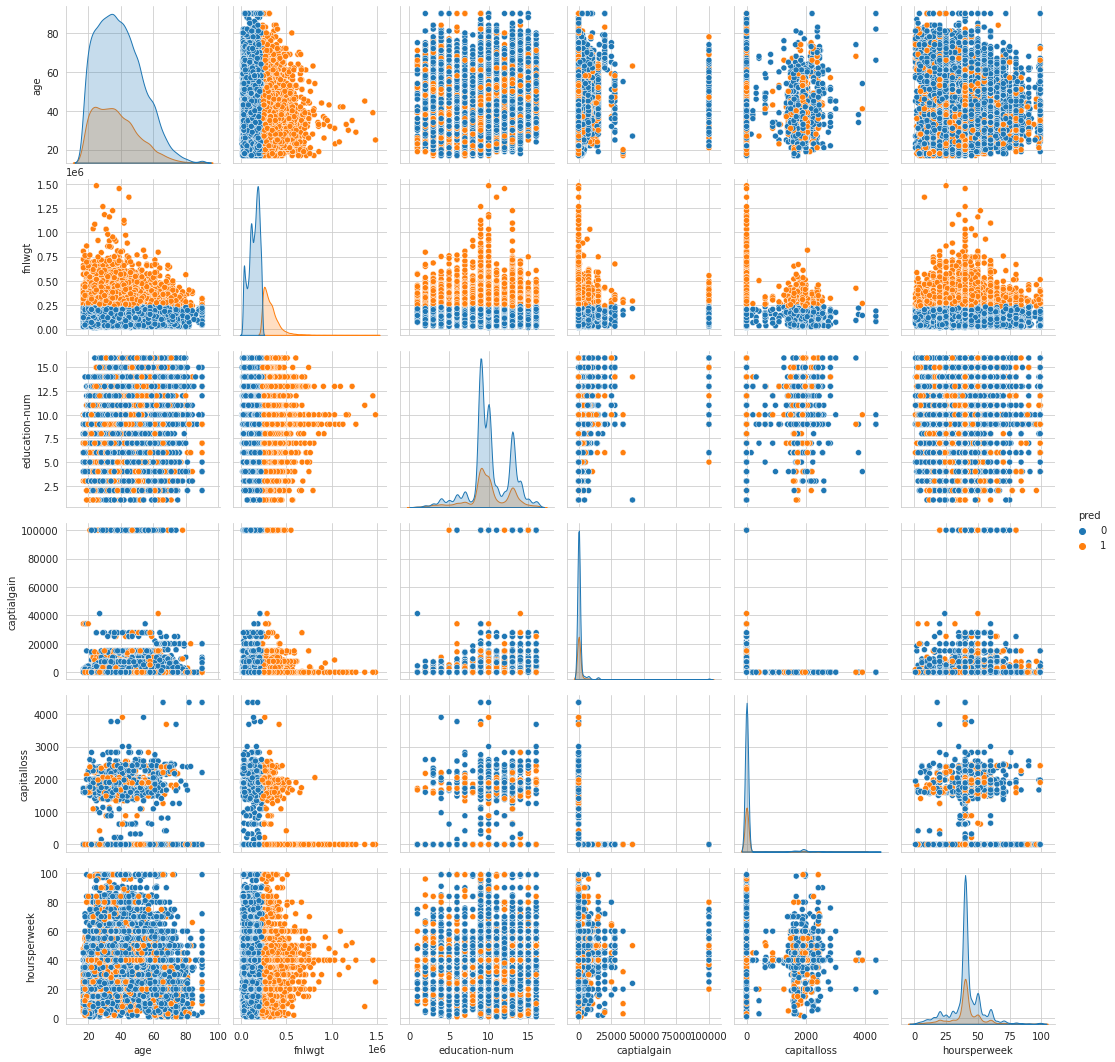

In [ ]:
sns.pairplot(data=dfs, vars=num_cols, hue='pred')